# Import Libraries

In [1]:
# For mathematical operations, functions, and random numbers: 
import numpy as np 

# For data analysis and manipulation, particularly useful with Excel:
import pandas as pd

#Plotting:
import matplotlib
import matplotlib.pyplot as plt # Adding shorthands just makes calling things easier!
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

%matplotlib notebook

# Import Your PDFs

In [2]:
Cu_PDF = pd.read_excel('00-004-0836 (Cu).xlsx', # Selects the last sheet in the excel workbook to be used
        usecols='A,B', # These are the columns in the excel sheet that data is loaded from
        names=['2q','Intensity']) # Assign variable names corresopnding to each data column

print(Cu_PDF) # Print to make sure it worked!

        2q  Intensity
0   43.297        100
1   50.433         46
2   74.130         20
3   89.931         17
4   95.139          5
5  116.918          3
6  136.507          9
7  144.714          8


In [3]:
Sb_new_PDF = pd.read_excel('00-035-0732 (Sb).xlsx', # Selects the last sheet in the excel workbook to be used
        usecols='A,B', # These are the columns in the excel sheet that data is loaded from
        names=['2q','Intensity']) # Assign variable names corresponding to each data column   

print(Sb_new_PDF) # Print to make sure it worked!

            2q  Intensity
0     23.68754      25.00
1     25.14986       4.00
2     28.68978     100.00
3     40.07697      70.00
4     41.94708      56.00
..         ...        ...
514  124.49626       0.80
515  124.49626       0.85
516  124.49626       0.90
517  124.49626       0.95
518  124.49626       1.00

[519 rows x 2 columns]


# Import Scan Data

In [5]:
No_Add_Sb = pd.read_excel('AO-I-063-No-Add-EDep-Char.xlsx', #Selects the last 
                            #sheet in the excel workbook to be used
        usecols='A,B', #These are the columns in the excel sheet that data is loaded from
        skiprows=1,                            
        names=['2q','Intensity']) #Variable names corresponding to each data column

In [6]:
CTAB_Sb = pd.read_excel('AO-I-063-30-mM-CTAB-EDep-Char.xlsx', #Selects the last 
                            #sheet in the excel workbook to be used
        usecols='A,B', #These are the columns in the excel sheet that data is loaded from
        skiprows=1,                            
        names=['2q','Intensity']) #Variable names corresponding to each data column

# Figure Making

<IPython.core.display.Javascript object>


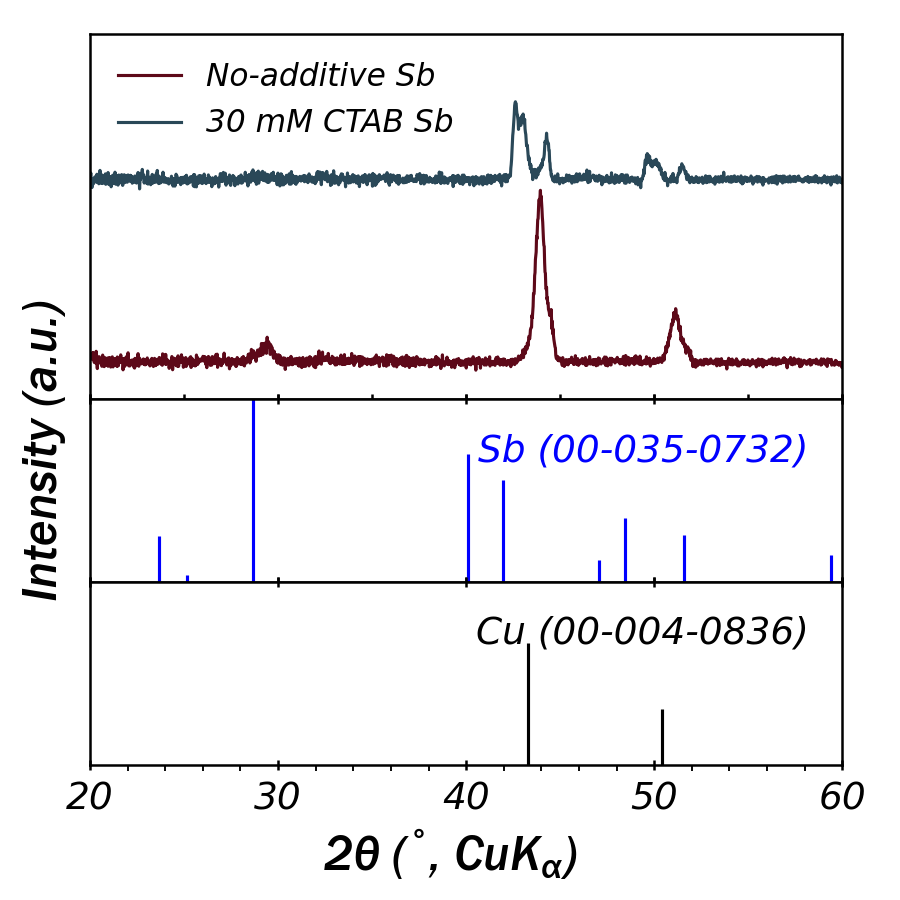

In [23]:
# For font nerds, you can choose a font here and make it "global", i.e. for all labels, tick markers, 
# titles in the figure!
plt.rcParams["font.family"] = "Franklin Gothic Book"
plt.rcParams["font.style"] = 'italic'
plt.rcParams['mathtext.default'] = 'regular'

# Declare a figure object and give it dimension:
fig = plt.figure(figsize=(4,4))

# XRD figures look nice in a "grid" format with separate plots but shared axes for the scan
# and PDFs.
gs = gridspec.GridSpec(3, 1, height_ratios=[1,0.5,0.5]) #Rows, Columns, [ht ratios]
gs.update(wspace=0.0, hspace=0.0) #Set the spacing between axes. I have it set to be flush. 

# Let's make a figure!
###################################################################################################################

# Plotting XRD scan data:
# Set the x variable to be your '2q' column from above
# Set the y variable to be your 'Intensity' column from above
ax1 = plt.subplot(gs[0])
x = No_Add_Sb['2q']
y = No_Add_Sb['Intensity']+5 # I use a slight offset to see things more clearly.

# Formatting:
# Select an appropriate range for your axes
# Tick labels for subplots are optional
ax1.set_xlim(20,60)
ax1.set_ylim(0,50)
ax1.set_xticklabels([]) # Comment these out to show labels
ax1.set_yticklabels([])
ax1.plot(x, y, lw=1, color = '#5d0919',label='No-additive Sb') # Plot your scan data, choose a color, label
ax1.tick_params(direction = 'inout', top = False, bottom = True, right = False, left = False) # Your preference here
ax1.legend(loc = 'upper left', frameon = False, bbox_transform=plt.gcf().transFigure) #Set the legend

####################################################################################################################
# Plotting XRD scan data:
# Set the x variable to be your '2q' column from above
# Set the y variable to be your 'Intensity' column from above
ax2 = plt.subplot(gs[0])
x2 = CTAB_Sb['2q']
y2 = CTAB_Sb['Intensity']+30 # I use a slight offset to see things more clearly.

# Formatting:
# Select an appropriate range for your axes
# Tick labels for subplots are optional
ax2.set_xlim(20,60)
ax2.set_ylim(0,50)
ax2.set_xticklabels([]) # Comment these out to show labels
ax2.set_yticklabels([])
ax2.plot(x2, y2, lw=1, color = '#2a4858',label='30 mM CTAB Sb') # Plot your scan data, choose a color, label
ax2.tick_params(direction = 'inout', top = False, bottom = True, right = False, left = False) # Your preference here
ax2.legend(loc = 'upper left', frameon = False, bbox_transform=plt.gcf().transFigure) #Set the legend
####################################################################################################################

# Plotting PDFs
# PDFs are not continuous functions, they require the use of 'vlines'
# Similar to scan data, set x and y variables the same
ax3 = plt.subplot(gs[1])
x3 = Sb_new_PDF['2q']
y3 = Sb_new_PDF['Intensity']

# Formatting:
# Select appropriate range for your axes
# Tick labels for subplots are optional
# Tick types are also optional, play around!
ax3.set_xlim(20,60)
ax3.set_ylim(0,100)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='minor', labelsize=12)
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.vlines(x3, [0], y3, lw=1, color = 'blue', label = 'Sb (00-035-0732)')
ax3.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax3.legend(loc = 'upper left', frameon = False, bbox_transform=plt.gcf().transFigure)

# Format the legend:
leg_3 = ax3.legend(loc = 'upper right',handlelength=0, handletextpad=0, fancybox=False, frameon=False, fontsize=12)
for item in leg_3.legendHandles:
    item.set_visible(False)
for text in leg_3.get_texts():
    text.set_color("blue")
    
###################################################################################################################
ax4 = plt.subplot(gs[2])
x4 = Cu_PDF['2q']
y4 = Cu_PDF['Intensity']
ax4.set_xlim(20,60)
ax4.set_ylim(0,150)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='minor', labelsize=12)
ax4.set_yticklabels([])
ax4.vlines(x4, [0], y4, lw=1, color = 'black', label = 'Cu (00-004-0836)')
ax4.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax4.legend(loc = 'upper left', frameon = False, bbox_transform=plt.gcf().transFigure)

leg_4 = ax4.legend(loc = 'upper right',handlelength=0, handletextpad=0, fancybox=False, frameon=False, fontsize=12)
for item in leg_4.legendHandles:
    item.set_visible(False)
for text in leg_4.get_texts():
    text.set_color("black")
    
# We want most ticks on the bottom plot, so change ax.# to reflect whatever that is
ax4.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4.xaxis.set_major_locator(ticker.AutoLocator())

# Add major labels:
fig.text(.5, .05, r'2$\theta$ ($^\degree$, CuK$_{\alpha}$)', ha='center', va='center',fontsize = 16,weight='bold',color='black',fontname='Franklin Gothic Medium',style='italic')
fig.text(0.05,.5, 'Intensity (a.u.)', ha='center', va='center', rotation='vertical', fontsize = 16,weight='bold',color='black',fontname='Franklin Gothic Medium',style='italic')

# Configure plot layout and save:
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.10)
plt.savefig("AO-I-063-XRD-Cryst-Amorph-Sb@tCu.jpg", dpi=300)
plt.show()

